# Remove duplicate rows

In [10]:
import os
import pandas as pd
import sys
import re
import json
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import glob
from pandas.core.common import flatten
import shutil
import pickle
import seaborn as sns
import collections

In [2]:
wd = os.getcwd()

DATA = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "processed")
FIGURES = os.path.join(os.path.sep, str(Path(wd).parents[0]), "reports", "figures")

DF_DICT = {}
for dftype in ['full', 'reduced', 'balanced']:
    DF_DICT[dftype] = os.path.join(os.path.sep, DATA, "df_focal_"+dftype+".pkl")

In [8]:
for dftype in ['full', 'reduced', 'balanced']:
    print(dftype)
    df = pd.read_pickle(DF_DICT[dftype])

    all_ids = list(df.callID.values)
    duplics = [item for item, count in collections.Counter(all_ids).items() if count>1]
    
    #df[df['callID'].isin(duplics)].sort_values(by=['callID'])
    
    df = df.drop_duplicates(subset='callID', keep="last")
    
    df.to_pickle(DF_DICT[dftype])
    print(len(duplics), " duplicates found and removed")

full
6  duplicates found and removed
reduced
2  duplicates found and removed
balanced
0  duplicates found and removed


## Re-do updated class frequency plots

Saved as:  /home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/labelcounts_full.png


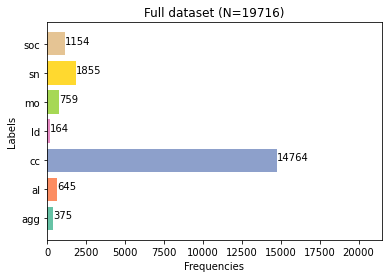

In [11]:
dftype='full'

df = pd.read_pickle(DF_DICT[dftype])
labelcounts = pd.DataFrame(df['call_lable'].value_counts())
labelcounts.sort_index(inplace=True)
pal = sns.color_palette("Set2", n_colors=len(labelcounts.index))
plt.barh(labelcounts.index, labelcounts.call_lable.values, color = pal)

for index, value in enumerate(labelcounts.call_lable.values):
    plt.text(value, index, str(value))

plt.title(dftype.capitalize()+' dataset (N='+str(df.shape[0])+')')
plt.ylabel('Labels')
plt.xlabel('Frequencies')
plt.xlim(0,21500)
#plt.show()
outpath = os.path.join(os.path.sep, FIGURES, "labelcounts_"+dftype+".png")
plt.savefig(outpath, facecolor='w')
print("Saved as: ", outpath)

Saved as:  /home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/new_labelcounts_reduced.png


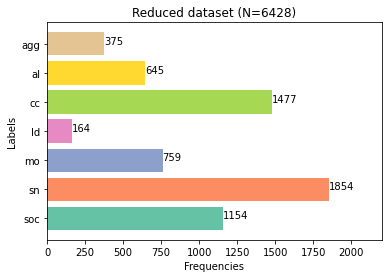

In [12]:
dftype='reduced'

df = pd.read_pickle(DF_DICT[dftype])

labelcounts = pd.DataFrame(df['call_lable'].value_counts())
labelcounts.sort_index(inplace=True, ascending=False)
pal = sns.color_palette("Set2", n_colors=len(labelcounts.index))
plt.barh(labelcounts.index, labelcounts.call_lable.values, color = pal)

for index, value in enumerate(labelcounts.call_lable.values):
    plt.text(value, index, str(value))

plt.title(dftype.capitalize()+' dataset (N='+str(df.shape[0])+')')
plt.ylabel('Labels')
plt.xlabel('Frequencies')
plt.xlim(0,21500)
outpath = os.path.join(os.path.sep, FIGURES, "labelcounts_"+dftype+".png")

plt.xlim(0,2200)
outpath = os.path.join(os.path.sep, FIGURES, "new_labelcounts_"+dftype+".png")

plt.savefig(outpath, facecolor='w')
print("Saved as: ", outpath)